### Image Blending

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import math

In [2]:
img1 = cv2.imread('saved/earth.jpg',-1)
# img2 = cv2.imread('saved/sun.jpg',-1)
img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2LUV)
print(img1.shape,img2.shape)

(619, 624, 3) (619, 624, 3)


In [3]:
# Resizing both images

width = max(img1.shape[1], img2.shape[1])
height = max(img1.shape[0], img2.shape[0])
img1 = cv2.resize(img1, (width, height))
img2 = cv2.resize(img2, (width, height))

print(img1.shape,img2.shape)

(619, 624, 3) (619, 624, 3)


In [4]:
# Create a mask for the left half of the image
mask = np.zeros((height, width), dtype=np.uint8)
mask[:, :width//2] = 255

# Blending ratio
alpha =1
beta = 1 #- alpha

# Blend the images using the mask
blended_image = cv2.addWeighted(cv2.bitwise_and(img1, img1, mask=~mask), alpha,
                                cv2.bitwise_and(img2, img2, mask=mask), beta, 0)

cv2.imshow('Blended Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Text(0.5, 1.0, 'Blended Images')

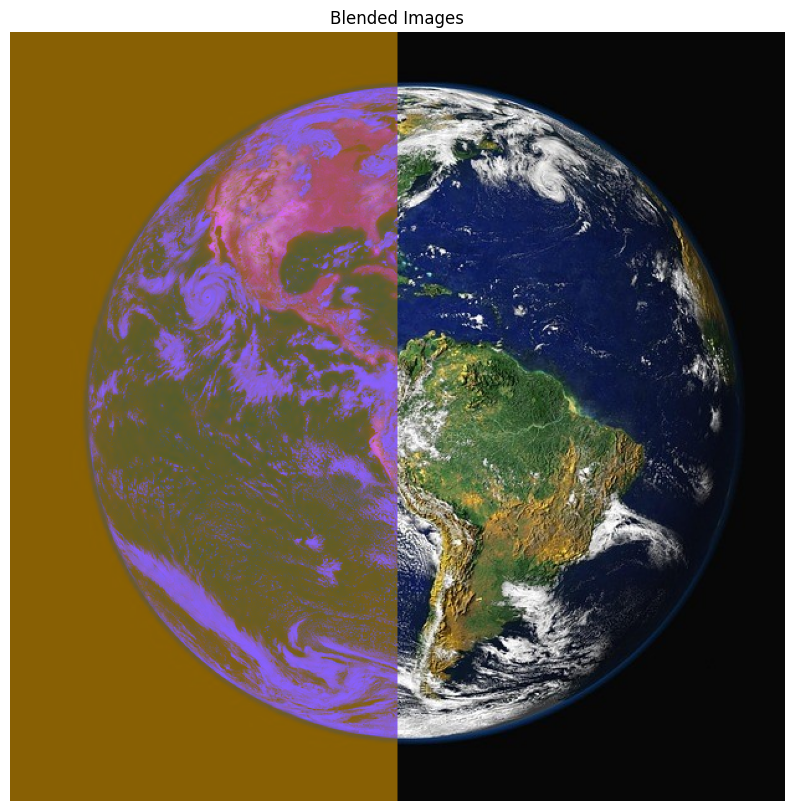

In [5]:
fig,ax = plt.subplots(figsize=(10,10))

# correcting color BGR->RGB
corrected_blended_image = cv2.cvtColor(blended_image,cv2.COLOR_BGR2RGB)
ax.imshow(corrected_blended_image)
ax.axis('off')
ax.set_title('Blended Images')